## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

## Read Data

In [2]:
data = pd.read_csv('Data_Transformations/data_robust.csv', index_col=False)
# y = data['y']
# data.drop('y', inplace=True, axis=1)

In [3]:
data.head()

0         1         2         3         4         5         6  \
0 -1.636364 -0.248371 -0.065812  0.013657  0.000000 -0.399999 -0.277777   
1 -0.818182 -0.337489 -0.065812 -0.189912  5.784542 -0.600000 -0.277777   
2  0.000000  0.384766  1.273231 -0.189912  0.000000  0.600000  3.055557   
3 -3.272727  1.062798  2.530286 -0.189912  0.184759 -0.500000  0.000000   
4  0.000000 -0.322542 -0.038102 -0.189912  0.000000 -0.500000  0.000000   

          7         8     9      10        11        12        13        14  \
0 -0.111112  0.000000  0.00 -0.3125 -0.408163 -0.431595 -0.279732  0.000000   
1 -0.222223  1.125001  1.00 -0.4375  0.816327  2.138626  1.230054  1.555556   
2 -0.222223  0.000000  0.00  0.3125  0.918367 -0.154715  0.509732  0.000000   
3 -0.222223  0.374999  0.25 -0.3750  0.918367 -0.564547  0.000000  0.000000   
4 -0.222223  0.000000  0.00 -0.3750 -0.367347 -0.117644 -0.109334  0.000000   

    15            y  
0  0.0    40.900749  
1  0.0  3202.467416  
2  0.0  2495.148862  
3  0.0  1666.670542  
4  0.0   817.714335

## K-Means - Original Standard Scaler

In [4]:
class K_means:
    def __init__(self , X , K, iters):
        self.X         = X
        self.K         = K
        self.m         = X.shape[0]
        self.n         = X.shape[1]
        self.iters     = iters
        
        self.idx       = np.empty([self.m, 1])
        self.centroids = np.empty([self.K, self.n])
        
    def findClosestCentroids(self):
        for row in range(self.m):
            self.idx[row] = np.argmin(np.linalg.norm( self.X[row] - self.centroids , axis = 1))
        return self.idx
        
    def computeCentroids(self):
        self.centroids = np.empty([self.K, self.n])
        for i in range(self.K):
            self.centroids[i] = np.mean(self.X[self.idx.flatten() == i], axis = 0)
        return self.centroids
    
    def kMeansInitCentroids(self):
        self.centroids = self.X[np.random.choice(self.m , self.K)]
        return self.centroids
    
    def k_kmeans(self):
        self.centroids = self.kMeansInitCentroids()
        for i in range(self.iters):
            self.idx = self.findClosestCentroids()
            self.centroids = self.computeCentroids()
        return self.centroids
    
    
    def predict(self, point):
        label = np.argmin(np.linalg.norm(point - self.centroids , axis = 1))
        return label

In [5]:
data.head()

0         1         2         3         4         5         6  \
0 -1.636364 -0.248371 -0.065812  0.013657  0.000000 -0.399999 -0.277777   
1 -0.818182 -0.337489 -0.065812 -0.189912  5.784542 -0.600000 -0.277777   
2  0.000000  0.384766  1.273231 -0.189912  0.000000  0.600000  3.055557   
3 -3.272727  1.062798  2.530286 -0.189912  0.184759 -0.500000  0.000000   
4  0.000000 -0.322542 -0.038102 -0.189912  0.000000 -0.500000  0.000000   

          7         8     9      10        11        12        13        14  \
0 -0.111112  0.000000  0.00 -0.3125 -0.408163 -0.431595 -0.279732  0.000000   
1 -0.222223  1.125001  1.00 -0.4375  0.816327  2.138626  1.230054  1.555556   
2 -0.222223  0.000000  0.00  0.3125  0.918367 -0.154715  0.509732  0.000000   
3 -0.222223  0.374999  0.25 -0.3750  0.918367 -0.564547  0.000000  0.000000   
4 -0.222223  0.000000  0.00 -0.3750 -0.367347 -0.117644 -0.109334  0.000000   

    15            y  
0  0.0    40.900749  
1  0.0  3202.467416  
2  0.0  2495.148862  
3  0.0  1666.670542  
4  0.0   817.714335

In [6]:
X = np.array(data)

In [7]:
c = K_means(X, 8, 30)
c.k_kmeans()
c.predict(X[4])

0

In [8]:
k = KMeans(8)
k.fit(data)
lables = k.labels_
lables

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [9]:
k.predict(X)

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

### Silhouette Score

In [10]:
print('KMeans Standard Scaled Silhouette Score: {}'.format\
      (silhouette_score(data, k.labels_, metric='euclidean')))

KMeans Standard Scaled Silhouette Score: 0.6301628329245458


### Visualize kmeans

Text(0, 0.5, 'Inertia')

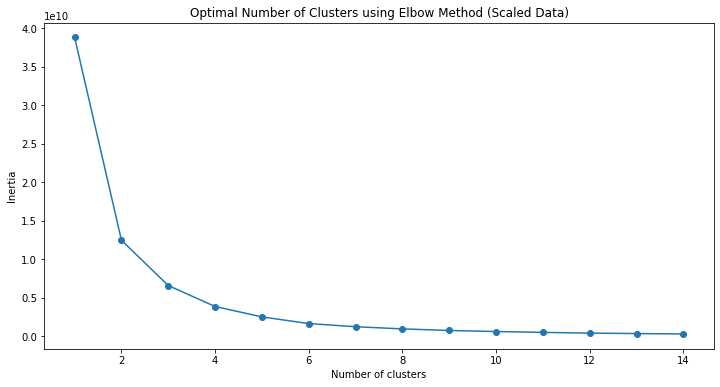

In [11]:
sse = []
k_list = range(1, 15)

for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [12]:
kmeans_labels = lables
kmeans_clusters = pd.concat([data, pd.DataFrame({'clusters':kmeans_labels})], axis=1)

In [13]:
kmeans_clusters.head()

0         1         2         3         4         5         6  \
0 -1.636364 -0.248371 -0.065812  0.013657  0.000000 -0.399999 -0.277777   
1 -0.818182 -0.337489 -0.065812 -0.189912  5.784542 -0.600000 -0.277777   
2  0.000000  0.384766  1.273231 -0.189912  0.000000  0.600000  3.055557   
3 -3.272727  1.062798  2.530286 -0.189912  0.184759 -0.500000  0.000000   
4  0.000000 -0.322542 -0.038102 -0.189912  0.000000 -0.500000  0.000000   

          7         8     9      10        11        12        13        14  \
0 -0.111112  0.000000  0.00 -0.3125 -0.408163 -0.431595 -0.279732  0.000000   
1 -0.222223  1.125001  1.00 -0.4375  0.816327  2.138626  1.230054  1.555556   
2 -0.222223  0.000000  0.00  0.3125  0.918367 -0.154715  0.509732  0.000000   
3 -0.222223  0.374999  0.25 -0.3750  0.918367 -0.564547  0.000000  0.000000   
4 -0.222223  0.000000  0.00 -0.3750 -0.367347 -0.117644 -0.109334  0.000000   

    15            y  clusters  
0  0.0    40.900749         0  
1  0.0  3202.467416         2  
2  0.0  2495.148862         2  
3  0.0  1666.670542         7  
4  0.0   817.714335         5

## Kmeans - PCA

In [14]:
pca = PCA(n_components = 4)  
pca.fit(data)

PCA(n_components=4)

In [15]:
x_pca = pca.transform(data)
x_pca.shape

(8950, 4)

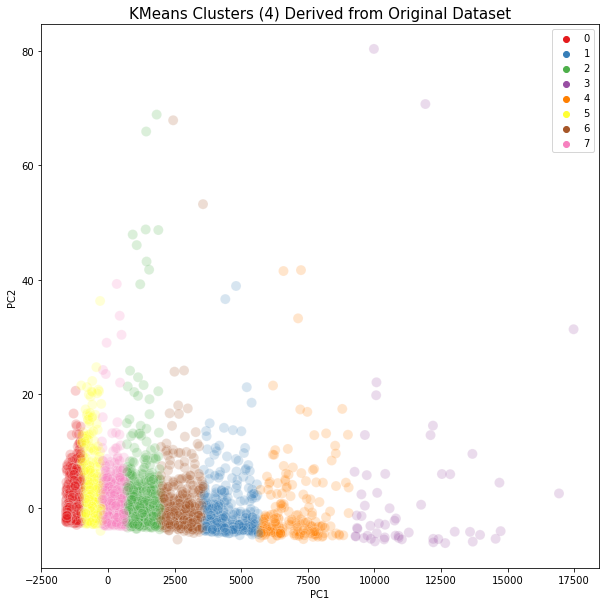

In [16]:
plt.figure(figsize = (10,10))
sns.scatterplot(x_pca[:,0], x_pca[:,1], 
                hue=kmeans_labels, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)

plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [17]:
Scene = dict(xaxis = dict(title  = 'PC1'),\
             yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))

trace = go.Scatter3d(x=x_pca[:,0],\
                     y=x_pca[:,1], z=x_pca[:,2], mode='markers',\
                     marker=dict(color = kmeans_labels, colorscale='Viridis',\
                     size = 10, line = dict(color = 'gray',width = 5)))

layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 750,width = 750)

data_t = [trace]

fig = go.Figure(data = data_t, layout = layout)

fig.show()

In [18]:
print("variance rate: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance rate:  [9.99988350e-01 3.62525061e-06 2.79012282e-06 1.19333191e-06]
sum:  0.9999959584048593


In [19]:
k_pca = KMeans(8)
k_pca.fit(x_pca)
k_pca.labels_

array([1, 7, 7, ..., 1, 1, 1], dtype=int32)

## T-SNE - Before K-Means 

In [20]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)

In [21]:
tsne_scale_results = tsne.fit_transform(data)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.000s...
[t-SNE] Computed neighbors for 8950 samples in 4.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 4.995356
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.289509
[t-SNE] KL divergence after 5000 iterations: 0.211830


In [22]:
tsne_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])

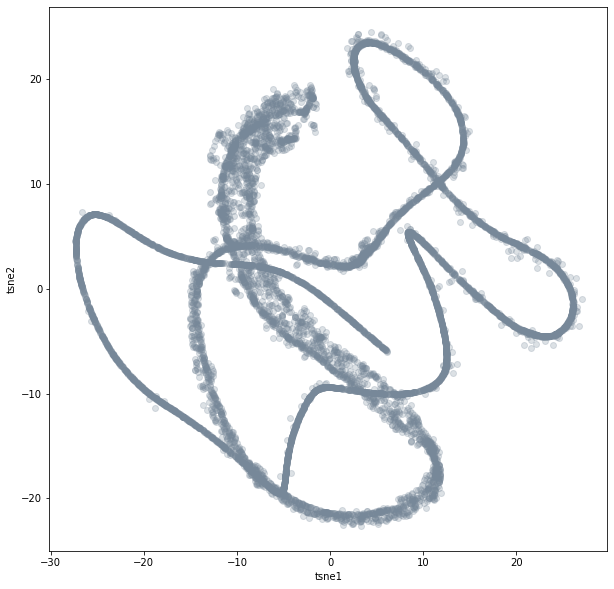

In [23]:
plt.figure(figsize = (10,10))
plt.scatter(tsne_scale.iloc[:,0],tsne_scale.iloc[:,1],alpha=0.25,\
            facecolor='lightslategray')

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

## T-SNE After KMeans

In [24]:
kmeans_tsne_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++',\
                           random_state=42).fit(tsne_scale)

In [25]:
print('KMeans tSNE Scaled Silhouette Score: {}'.format\
      (silhouette_score(tsne_scale, kmeans_tsne_scale.labels_, metric='euclidean')))

KMeans tSNE Scaled Silhouette Score: 0.29577451944351196


In [26]:
labels_tsne_scale = kmeans_tsne_scale.labels_

In [27]:
clusters_tsne_scale = pd.concat([tsne_scale, pd.DataFrame\
                                 ({'tsne_clusters':labels_tsne_scale})], axis=1)

In [28]:
clusters_tsne_scale.head()

tsne1      tsne2     tsne3  tsne_clusters
0  -9.093884   0.415937  1.386113              2
1 -15.561167 -12.336782 -9.814174              2
2  -3.725936 -13.133972  3.913326              0
3   9.360003   3.002410 -6.797864              1
4   7.750347  22.212381 -4.654715              1

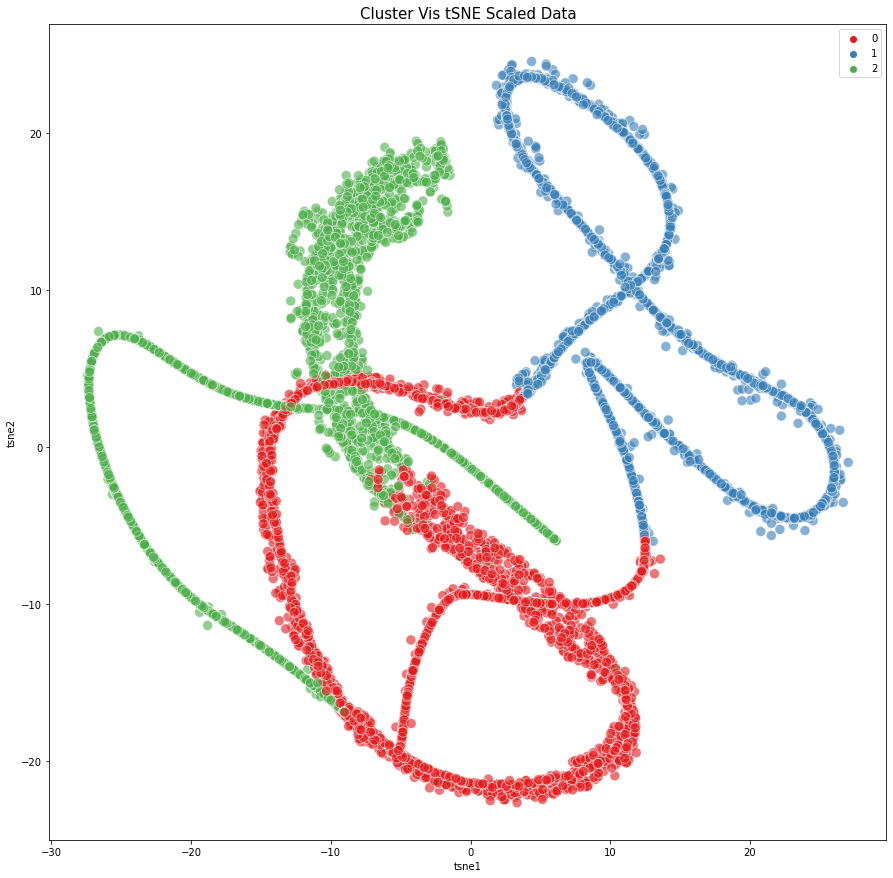

In [29]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1]\
                ,hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6)\
                 .set_title('Cluster Vis tSNE Scaled Data', fontsize=15)

plt.legend()
plt.show()

## Hirarichal Cluster

In [30]:
heir_complete = AgglomerativeClustering(n_clusters = 8 ,linkage='complete').fit(data)
heir_single   = AgglomerativeClustering(n_clusters = 8 ,linkage='single').fit(data)
heir_average  = AgglomerativeClustering(n_clusters = 8 ,linkage='average').fit(data)
heir_centroid = AgglomerativeClustering(n_clusters = 8 ,linkage='ward').fit(data)

In [31]:
heir_clusters_complete = pd.DataFrame(heir_complete.labels_, columns = ['c_clusters'])
heir_clusters_single   = pd.DataFrame(heir_single.labels_, columns   = ['s_clusters'])
heir_clusters_average  = pd.DataFrame(heir_average.labels_, columns  = ['a_clusters'])
heir_clusters_centroid = pd.DataFrame(heir_centroid.labels_, columns = ['w_clusters'])

In [32]:
heir_clusters_complete.head()

c_clusters
0           5
1           1
2           1
3           5
4           5

In [33]:
heir_clusters_single.head()

s_clusters
0           0
1           0
2           0
3           0
4           0

In [34]:
heir_clusters_average.head()

a_clusters
0           2
1           6
2           6
3           2
4           2

In [35]:
heir_clusters_centroid.head()

w_clusters
0           0
1           3
2           5
3           2
4           0

## Hirarichal Cluster - PCA

In [36]:
heir_r_complete = AgglomerativeClustering(n_clusters = 8 ,linkage='complete').fit(x_pca)
heir_r_singel   = AgglomerativeClustering(n_clusters = 8 ,linkage='single').fit(x_pca)
heir_r_average  = AgglomerativeClustering(n_clusters = 8 ,linkage='average').fit(x_pca)
heir_r_centroid = AgglomerativeClustering(n_clusters = 8 ,linkage='ward').fit(x_pca)

In [37]:
heir_clusters_r_complete = pd.DataFrame(heir_r_complete.labels_, columns = ['Clusters C Reduced'])
heir_clusters_r_single   = pd.DataFrame(heir_r_singel.labels_, columns = ['Clusters S Reduced'])
heir_clusters_r_average  = pd.DataFrame(heir_r_average.labels_, columns = ['Clusters A Reduced'])
heir_clusters_r_centroid = pd.DataFrame(heir_r_centroid.labels_, columns = ['Clusters W Reduced'])

In [38]:
heir_clusters_r_complete.head()

Clusters C Reduced
0                   2
1                   5
2                   5
3                   2
4                   2

In [39]:
heir_clusters_r_single.head()

Clusters S Reduced
0                   0
1                   0
2                   0
3                   0
4                   0

In [40]:
heir_clusters_r_average.head()

Clusters A Reduced
0                   1
1                   6
2                   1
3                   1
4                   1

In [41]:
heir_clusters_r_centroid.head()

Clusters W Reduced
0                   7
1                   4
2                   4
3                   0
4                   3